# **Steel Power Conception Prediction**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/assignment/Steel_industry_data.csv')
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# **Find Missing Values**

In [ ]:
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

# **Find dtypes**

In [ ]:
df.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

# **Label Encoding or Maping**

In [ ]:
df['Load_Type']=df['Load_Type'].map({'Light_Load':0,'Medium_Load':1,'Maximum_Load':2})
df['Day_of_week']=df['Day_of_week'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})
df['WeekStatus']=df['WeekStatus'].map({'Weekday':0,'Weekend':1})
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,0,0,0
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,0,0
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,0,0
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,0,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,0,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,0,0
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,0,0
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,0,0


# **Data Value Counts**

In [ ]:
print('LOAD_TYPE \n',df['Load_Type'].value_counts())
print('\n DAY_OF_WEEK \n',df['Day_of_week'].value_counts())
print('\n WEEKSTATUS \n',df['WeekStatus'].value_counts())

LOAD_TYPE 
 0    18072
1     9696
2     7272
Name: Load_Type, dtype: int64

 DAY_OF_WEEK 
 0    5088
1    4992
2    4992
3    4992
4    4992
5    4992
6    4992
Name: Day_of_week, dtype: int64

 WEEKSTATUS 
 0    25056
1     9984
Name: WeekStatus, dtype: int64


# **Description**

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932,2.991781,0.691781
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,2.003433,0.792658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,1.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000,3.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,5.000000,1.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,6.000000,2.000000


# **Correlation of Data**

In [ ]:
df.corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,2.346103e-01,-2.954748e-01,-2.407046e-01,0.614570
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,8.266237e-02,-3.198698e-01,-2.562275e-01,0.451899
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,3.716046e-01,2.604306e-01,2.129219e-01,0.001776
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,2.317260e-01,-2.904670e-01,-2.352975e-01,0.610653
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,5.652695e-01,5.408210e-02,4.246488e-02,0.519189
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-3.605630e-01,-3.146749e-01,-2.576774e-01,0.075394
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000e+00,-9.027984e-17,-1.052838e-16,0.482767
WeekStatus,-0.295475,-0.319870,0.260431,-0.290467,0.054082,-0.314675,-9.027984e-17,1.000000e+00,7.903022e-01,-0.199950
Day_of_week,-0.240705,-0.256227,0.212922,-0.235298,0.042465,-0.257677,-1.052838e-16,7.903022e-01,1.000000e+00,-0.168947
Load_Type,0.614570,0.451899,0.001776,0.610653,0.519189,0.075394,4.827670e-01,-1.999500e-01,-1.689472e-01,1.000000


# **Data Output and Input**

In [ ]:
X=df.iloc[:,2:]
y=df.iloc[:,1]
z=X
X


,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2.95,0.00,0.0,73.21,100.00,900,0,0,0
1,4.46,0.00,0.0,66.77,100.00,1800,0,0,0
2,3.28,0.00,0.0,70.28,100.00,2700,0,0,0
3,3.56,0.00,0.0,68.09,100.00,3600,0,0,0
4,4.50,0.00,0.0,64.72,100.00,4500,0,0,0
...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800,0,0,0
35036,3.74,0.00,0.0,70.71,100.00,83700,0,0,0
35037,3.17,0.07,0.0,76.62,99.98,84600,0,0,0
35038,3.06,0.11,0.0,77.72,99.96,85500,0,0,0


In [ ]:
y

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Usage_kWh, Length: 35040, dtype: float64

# **Data Visualization**

<Axes: >

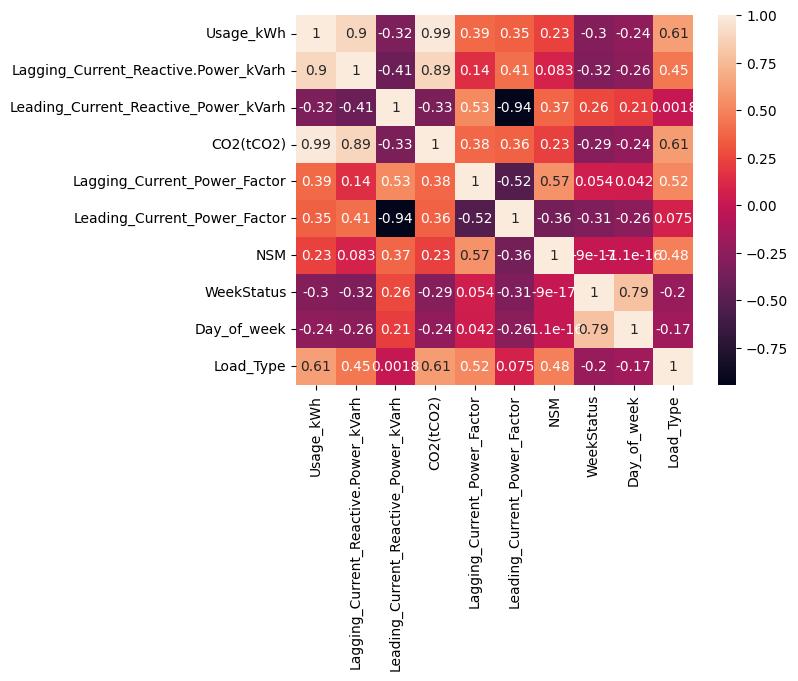

In [ ]:
sns.heatmap(df.corr(),annot=True)

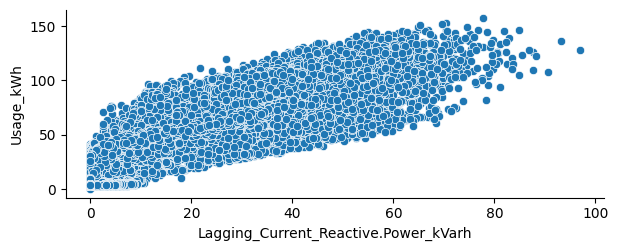

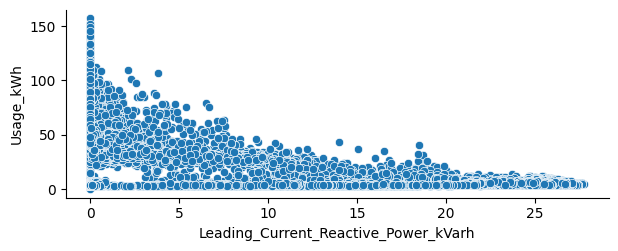

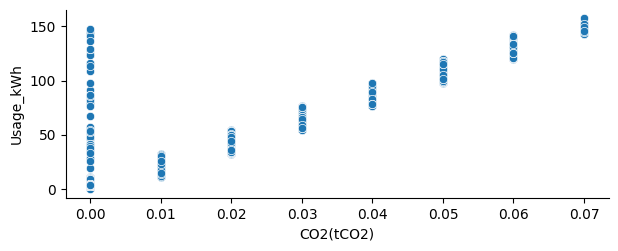

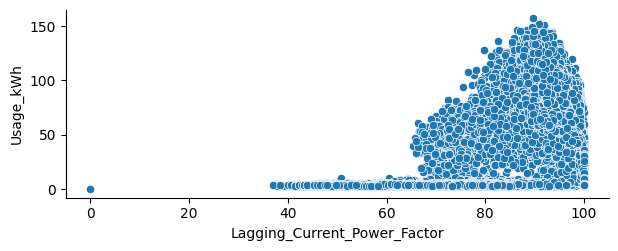

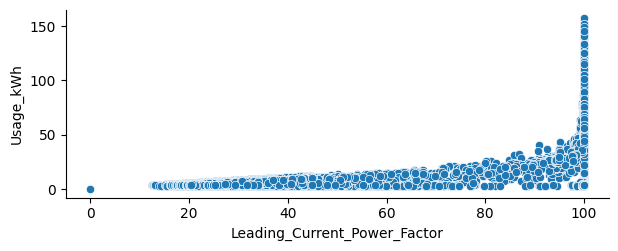

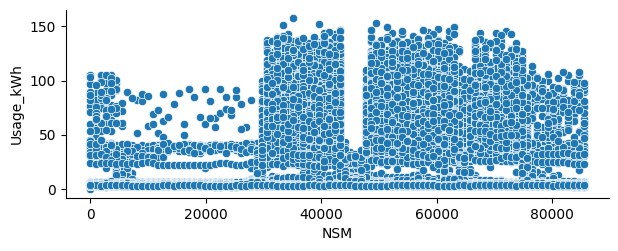

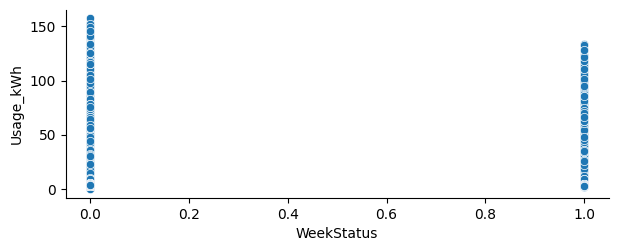

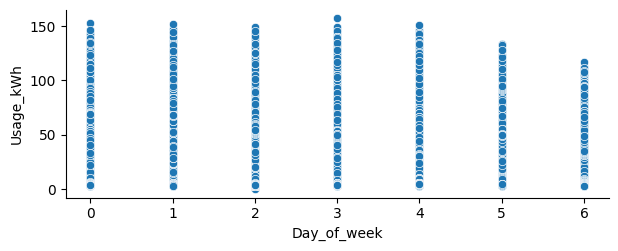

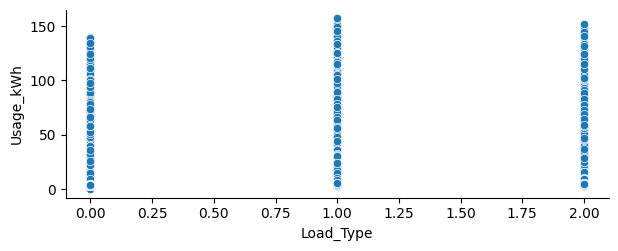

In [ ]:
for i in X.columns:
  sns.pairplot(df,x_vars=i,y_vars='Usage_kWh',kind='scatter',aspect=2.5)

In [ ]:
y

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Usage_kWh, Length: 35040, dtype: float64

# **Train Test Data Spliting**

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
X

array([[0.03044062, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04602208, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03384584, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03271076, 0.00252161, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03157569, 0.00396254, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03116293, 0.00252161, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# **Traning the Data With Several Models and**
# **Checking Accuracy and Errors**

In [ ]:
knn=KNeighborsRegressor()
abr=AdaBoostRegressor()
lr=LinearRegression()
gbr=GradientBoostingRegressor()
dtr=DecisionTreeRegressor()
lst=[knn,abr,lr,gbr,dtr]
for i in lst:
  print('********************',i,'*******************************')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('R2_score:',r2_score(y_test,y_pred))
  print('mean absolute error:',mean_absolute_error(y_test,y_pred))
  print('mean squared error:',mean_squared_error(y_test,y_pred))
  print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


******************** KNeighborsRegressor() *******************************
R2_score: 0.9907285666711984
mean absolute error: 1.688173325722983
mean squared error: 10.349837489726028
RMSE: 3.2171163313946276
******************** AdaBoostRegressor() *******************************
R2_score: 0.97038888805936
mean absolute error: 4.999389896606346
mean squared error: 33.0553201006862
RMSE: 5.7493756270299645
******************** LinearRegression() *******************************
R2_score: 0.9769729276767392
mean absolute error: 2.5585670555650046
mean squared error: 25.705459766351048
RMSE: 5.07005520348162
******************** GradientBoostingRegressor() *******************************
R2_score: 0.9923575392417775
mean absolute error: 1.8040120954628822
mean squared error: 8.53139143259463
RMSE: 2.9208545723117796
******************** DecisionTreeRegressor() *******************************
R2_score: 0.9980566328607129
mean absolute error: 0.5467732115677322
mean squared error: 2.169409341

# **Taking Best Model**

In [ ]:
dtr1=DecisionTreeRegressor()
dtr1.fit(X_train,y_train)
y_pred=dtr1.predict(X_test)
print('R2_score:',r2_score(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


R2_score: 0.9979708729885244
mean absolute error: 0.5437404870624049
mean squared error: 2.2651443493150687
RMSE: 1.505039650412928


# **Small Representaion of Tree**

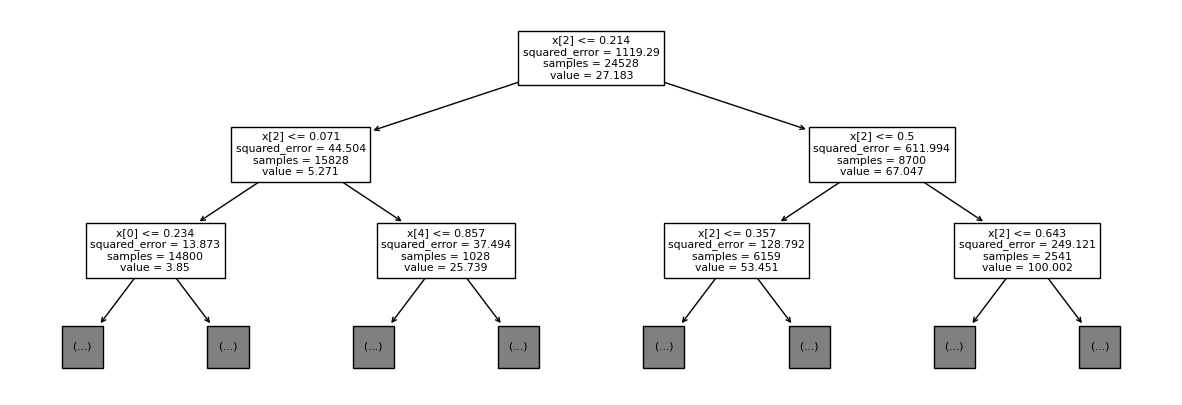

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,5))
tree.plot_tree(dtr1,max_depth=2)
plt.show()

# **Test Predict Comparison**

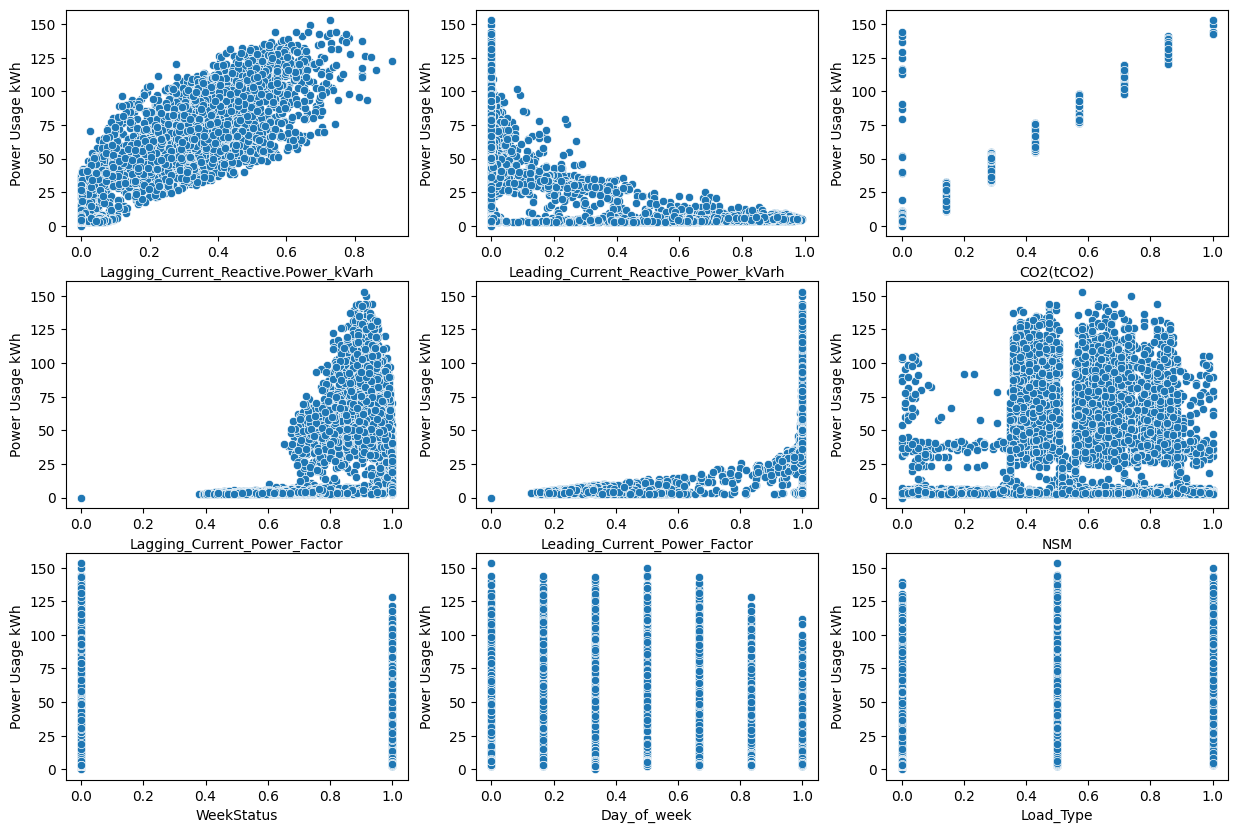

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axes_flat=axes.flatten()
for i,j in enumerate(z):
  sns.scatterplot(x=X_test[:,i],y=y_test,ax=axes_flat[i])
  axes_flat[i].set_xlabel(j)
  axes_flat[i].set_ylabel('Power Usage kWh')


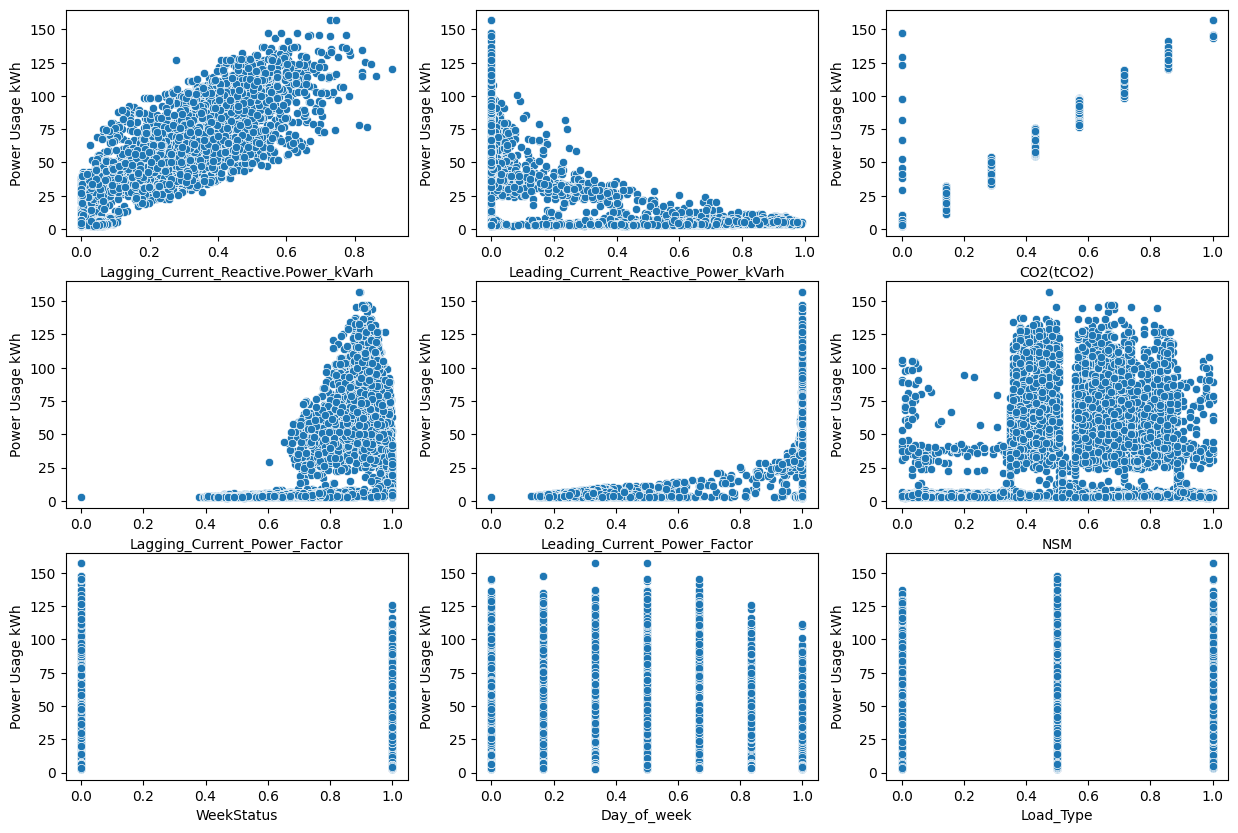

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axes_flat=axes.flatten()
for i,j in enumerate(z):
  sns.scatterplot(x=X_test[:,i],y=y_pred,ax=axes_flat[i])
  axes_flat[i].set_xlabel(j)
  axes_flat[i].set_ylabel('Power Usage kWh')


# **Value Prediction**

In [ ]:
ynew=dtr1.predict(scaler.transform([[2.95,0.00,0.0,73.21,100.00,900,0,0,0]]))
print('Usage of power in kWh=',ynew[0])

Usage of power in kWh= 3.17


# **File saving**

In [ ]:
import joblib
joblib.dump(dtr1,'model1.pkl')

['model1.pkl']

In [ ]:
joblib.dump(scaler,open('mscaler.pkl','wb'))

# **Streamlit**

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
!wget -q -O - - ipv4.icanhazip.com

35.243.245.52


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0

npx: installed 22 in 4.284s
your url is: https://rare-weeks-talk.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.245.52:8501

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/lo